In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [18]:
columns_name=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss',
                                    'house_per_week','native_country','target'] 
df_train= pd.read_csv('adult.data.csv',header=None ,names = columns_name)
df_train.drop(columns= ['fnlwgt'],inplace=True)
df_train.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
columns_name= ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss',
                                       'house_perweek','native_country','target']
df_test = pd.read_csv('adult.test.csv', header=None,names =  columns_name)
df_test.drop(columns='fnlwgt',inplace=True)
df_test= df_test.iloc[1:]
df_test.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_perweek,native_country,target
1,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


Spilt the Data


In [20]:
A_train = df_train.iloc[:,:-1]
B_train = df_train.iloc[:,-1]
print (B_train.head())
lebel_en = LabelEncoder()
B_train = lebel_en.fit_transform(B_train)
print(B_train)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target, dtype: object
[0 0 0 ... 0 0 1]


In [21]:
df_test['age'] = pd.to_numeric(df_test['age'])

In [22]:
A_test = df_test.iloc[:,:-1]
B_test = df_test.iloc[:,-1]
print(B_test.head())
lebel_en2 = LabelEncoder()
B_test = lebel_en2.fit_transform(B_test)
print(B_test)

1     <=50K.
2     <=50K.
3      >50K.
4      >50K.
5     <=50K.
Name: target, dtype: object
[0 0 1 ... 0 0 1]


In [23]:
A_train_encoded = pd.get_dummies(A_train,drop_first=True)
A_test_encoded = pd.get_dummies(A_test,drop_first=True)


Accuracy 0.9837233585160616


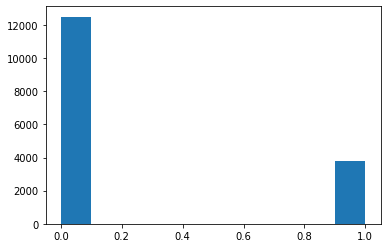

In [24]:
clf = RandomForestClassifier()
clf.fit(A_test_encoded,B_test)
B_pred = clf.predict(A_test_encoded)
print('Accuracy',metrics.accuracy_score(B_test,B_pred))
plt.hist(B_pred)
plt.show()